# Decision trees and Ensemble methods

### Shruti Goyal
### 21BDA51

#### QUES-1)  Apply boosting, bagging, and random forests to a data set of your choos-ing for a classification problem.  Fit the models on a train and test set.Evaluate your models, and compare your results against logistic regression and SVMs.  Which models produce better results?  Try to explain your results.

Car Evaluation Database
It is a multi-class classification problem. Task is to classify our dataset into 4 classes : Unacceptable, Acceptable, Good, Very-Good.

Independent variables
buying : buying price
maint : maintenance price
doors : number of doors
persons : capacity in terms of persons to carry
lug_boot : the size of luggage boot
safety: estimated safety of the car
Target Variable
Class

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/91999/Downloads/car_evaluation.csv')

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
#Columns are categorical, check for unique values of each column

for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [6]:
#Check how these unique categories are distributed among the columns

for i in data.columns:
    print(data[i].value_counts())
    print()

med      432
low      432
high     432
vhigh    432
Name: buying, dtype: int64

med      432
low      432
high     432
vhigh    432
Name: maint, dtype: int64

2        432
4        432
5more    432
3        432
Name: doors, dtype: int64

2       576
more    576
4       576
Name: persons, dtype: int64

med      576
big      576
small    576
Name: lug_boot, dtype: int64

med     576
low     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



From above output, it is clear that all the columns except 'class' are distributed equally among data.

<AxesSubplot:xlabel='class', ylabel='count'>

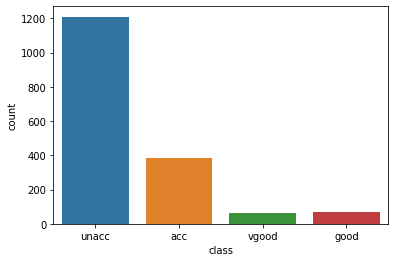

In [7]:
# Class Distribution
sns.countplot(data['class'])

It can be seen from the graph that the result 'class' is unbalanced with larger values of 'unacc'. So, this is an unbalanced multiclass classification problem.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [11]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<AxesSubplot:>

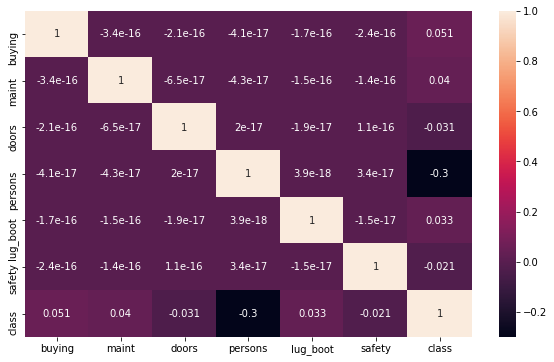

In [12]:
# Correlation matrix

fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Most of the columns show very weak correlation with 'class' So, doing any analysis on them may not give any productive output.

In [13]:
X=data[data.columns[:-1]]
y=data['class']

In [14]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Modeling

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

In [17]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

### 1) Random Forests Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [19]:
rf = RandomForestClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 same as DT
rf.fit(X_train,y_train)

yp_train = rf.predict(X_train)
yp_test = rf.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       266
           1       1.00      0.20      0.33        50
           2       0.98      1.00      0.99       852
           3       0.97      0.90      0.94        41

    accuracy                           0.95      1209
   macro avg       0.95      0.76      0.79      1209
weighted avg       0.95      0.95      0.94      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       118
           1       1.00      0.11      0.19        19
           2       0.95      0.99      0.97       358
           3       1.00      0.88      0.93        24

    accuracy                           0.92       519
   macro avg       0.94      0.71      0.73       519
weighted avg       0.93      0.92    

### 2) Bagging

In [20]:
from sklearn.ensemble import BaggingClassifier

tree =  RandomForestClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

yp_train = bagging_clf.predict(X_train)
yp_test = bagging_clf.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       118
           1       0.71      0.79      0.75        19
           2       0.99      1.00      0.99       358
           3       0.91      0.88      0.89        24

    accuracy                           0.97       519
   macro avg       0.89      0.89      0.89       519
weighted avg       0.97      0.97    

### 3) AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)

yp_train = ada_boost_clf.predict(X_train)
yp_test = ada_boost_clf.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.62      0.52      0.56       266
           1       0.38      0.88      0.53        50
           2       0.88      0.84      0.86       852
           3       0.67      1.00      0.80        41

    accuracy                           0.78      1209
   macro avg       0.64      0.81      0.69      1209
weighted avg       0.80      0.78      0.78      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.59      0.48      0.53       118
           1       0.37      0.84      0.52        19
           2       0.88      0.85      0.86       358
           3       0.69      1.00      0.81        24

    accuracy                           0.77       519
   macro avg       0.63      0.79      0.68       519
weighted avg       0.79      0.77    

### 4) Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)

yp_train = grad_boost_clf.predict(X_train)
yp_test = grad_boost_clf.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       266
           1       0.94      1.00      0.97        50
           2       1.00      0.99      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           0.99      1209
   macro avg       0.98      1.00      0.99      1209
weighted avg       0.99      0.99      0.99      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       118
           1       0.72      0.95      0.82        19
           2       1.00      0.99      1.00       358
           3       0.92      0.96      0.94        24

    accuracy                           0.98       519
   macro avg       0.90      0.96      0.93       519
weighted avg       0.98      0.98    

### 5) Logistic Regression

In [23]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(X_train,y_train)

yp_train = lr.predict(X_train)
yp_test = lr.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.41      0.21      0.28       266
           1       0.00      0.00      0.00        50
           2       0.75      0.92      0.83       852
           3       0.42      0.24      0.31        41

    accuracy                           0.71      1209
   macro avg       0.39      0.35      0.35      1209
weighted avg       0.63      0.71      0.66      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.30      0.18      0.22       118
           1       0.00      0.00      0.00        19
           2       0.73      0.90      0.81       358
           3       0.14      0.04      0.06        24

    accuracy                           0.66       519
   macro avg       0.29      0.28      0.27       519
weighted avg       0.58      0.66    

### 6) Support Vector Machine

In [24]:
from sklearn import svm

sv = svm.SVC()
sv.fit(X_train,y_train)

yp_train = sv.predict(X_train)
yp_test = sv.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       266
           1       1.00      0.28      0.44        50
           2       0.93      1.00      0.96       852
           3       0.97      0.90      0.94        41

    accuracy                           0.91      1209
   macro avg       0.93      0.74      0.79      1209
weighted avg       0.92      0.91      0.91      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       118
           1       1.00      0.21      0.35        19
           2       0.91      0.99      0.95       358
           3       0.88      0.88      0.88        24

    accuracy                           0.89       519
   macro avg       0.90      0.70      0.73       519
weighted avg       0.89      0.89    

### Based on the accuracy of testing and training data, we can say that bagging outperform all the other classification models.